In [10]:
import matplotlib.pyplot as plt

from ishigami import *

# Uncertainty propagation

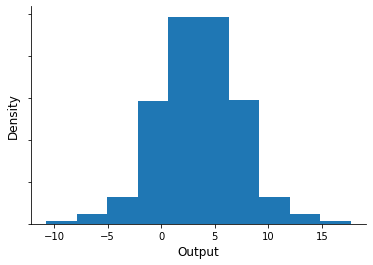

In [25]:
fig, ax = plt.subplots()

ax.hist(output, density=True)
ax.set_ylabel("Density")
ax.set_xlabel("Output")
ax.set_yticklabels([])
fig.savefig("fig-ishigami-uncertainty-propagation")


In [36]:
grid = np.linspace(10000, num_draws, dtype=int, num=100)

rslt = [np.var(output[:subset]) for subset in grid]

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

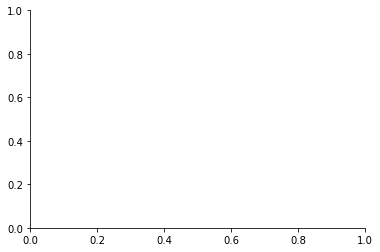

In [48]:
fig, ax = plt.subplots()

ax.plot(grid, rslt, label='Simulation') 
ax.plot(grid, [compute_analytically_overall_variance()] * len(grid), label='Truth')
ax.set_ylabel("Overall variance")
ax.set_xlabel("Simulation draws")
ax.legend()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.savefig("fig-ishigami-unconditional-variance")

# Main effects

In [51]:
grid = np.linspace(100, 1000, dtype=int, num=100)

rslt = dict()
for which in range(3):
    rslt[which] = list()
    for num_draws in grid:
        stat = compute_simulation_main_effect(num_draws, num_draws, which)
        rslt[which].append(stat)

KeyboardInterrupt: 

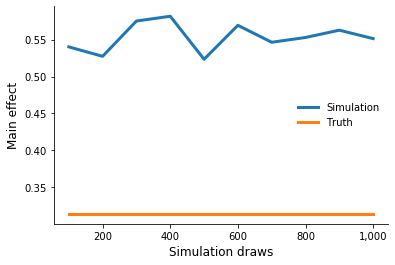

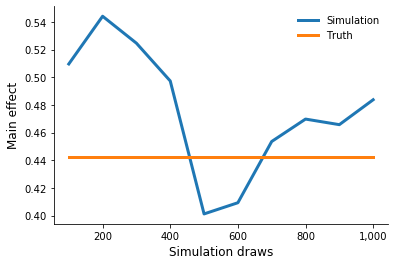

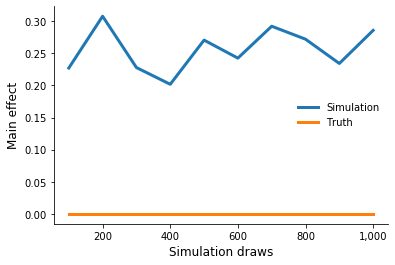

In [56]:
plt.close()

for which in range(3):
    
    benchmark = [compute_analytically_main_effects()[which]] * len(grid)

        
    fig, ax = plt.subplots()

    ax.plot(grid, rslt[which], label='Simulation') 
    ax.plot(grid, benchmark, label='Truth')
    ax.set_ylabel("Main effect")
    ax.set_xlabel("Simulation draws")
    ax.legend()

    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    fig.savefig(f"fig-ishigami-main-effect-{which}")


# Total effects

In [52]:
grid = np.linspace(100, 1000, dtype=int, num=10)

rslt = dict()
for which in range(3):
    rslt[which] = list()
    for num_draws in grid:
        stat = compute_simulation_total_effect(num_draws, num_draws, which)
        rslt[which].append(stat)

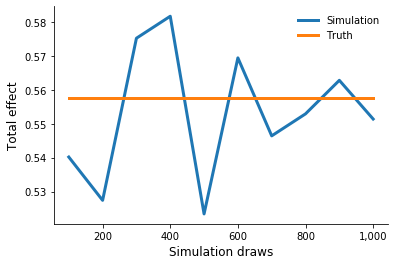

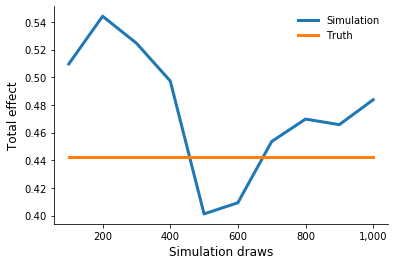

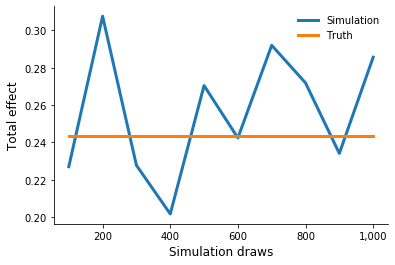

In [55]:
plt.close()

for which in range(3):
    
    benchmark = [compute_analytically_total_effects()[which]] * len(grid)
    
    fig, ax = plt.subplots()

    ax.plot(grid, rslt[which], label='Simulation') 
    ax.plot(grid, benchmark, label='Truth')
    ax.set_ylabel("Total effect")
    ax.set_xlabel("Simulation draws")
    ax.legend()

    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    fig.savefig(f"fig-ishigami-main-effect-{which}")
